In [2]:
import sys
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy import integrate
# plot inline rather than pop out
%matplotlib notebook

The following example is taken from "A First Course in Computational Physics" by Paul L. DeVries.

Consider the following second order homogeneous ordinary differential equation

$$
y^{\prime\prime} - 6x = 0
$$

subject to the boundary conditions $y(0) = 0\,, y(1) = 1\,.$

Define the following basis functions:

$$
\phi_i(x) = 
\begin{cases}
0\,, &x \le x_{i-1}\, &\\[2mm]
\dfrac{x - x_{i-1}}{x_i - x_{i-1}}\,, &x_{i-1} \le x \le x_i\, &&\\[2mm]
\dfrac{x_{i+1} - x}{x_{i+1} - x_{i}}\,, &x_{i} \le x \le x_{i+1}\, &&\\[2mm]
0\,, & x_{i+1} \le x\,.
\end{cases}
$$

Define an arbitrary piecewise linear trial function $p(x)$ which can be written as

$$
p(x) = \sum_{i=0}^{N}c_{i}\phi_i(x)\,.
$$

where the total region has been broken into $N$ intervals where $p(0) = y(0)$ and $p(1)= y(1)\,.$ Unpacking this we get 

$$
p(x) = c_0\phi_0(x) + c_1\phi_1(x) +\,\ldots\,+c_N\phi_{N}(x)\,.
$$

The boundary conditions mean that $p(0) = c_0\phi_0(0) = 0$ and that $p(1) = c_{N}\phi_{N}(x) = y(1)\,.$
Since $\phi_0(0)=1$ and $\phi_{N}(1)=1$ it follows that $c_0 = 0$ and that $c_{N} = y(1) = 1\,.$

In [9]:
while True:
    string = input("Enter the number of elements,N_e: ")
    try:
        N_e = int(string)
    except:
        print(string," is not a valid number, try again ... ")
        continue # return to the start of the while loop
    else:
        print(N_e," is a valid number")
        break

Enter the number of elements,N_e: 10
10  is a valid number


In [23]:
N_n = N_e + 1
nodes = []
for i in range(N_n):
    nodes.append(i*1/N_e)
print(nodes)



[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [24]:
elements = [[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10]]

<IPython.core.display.Javascript object>


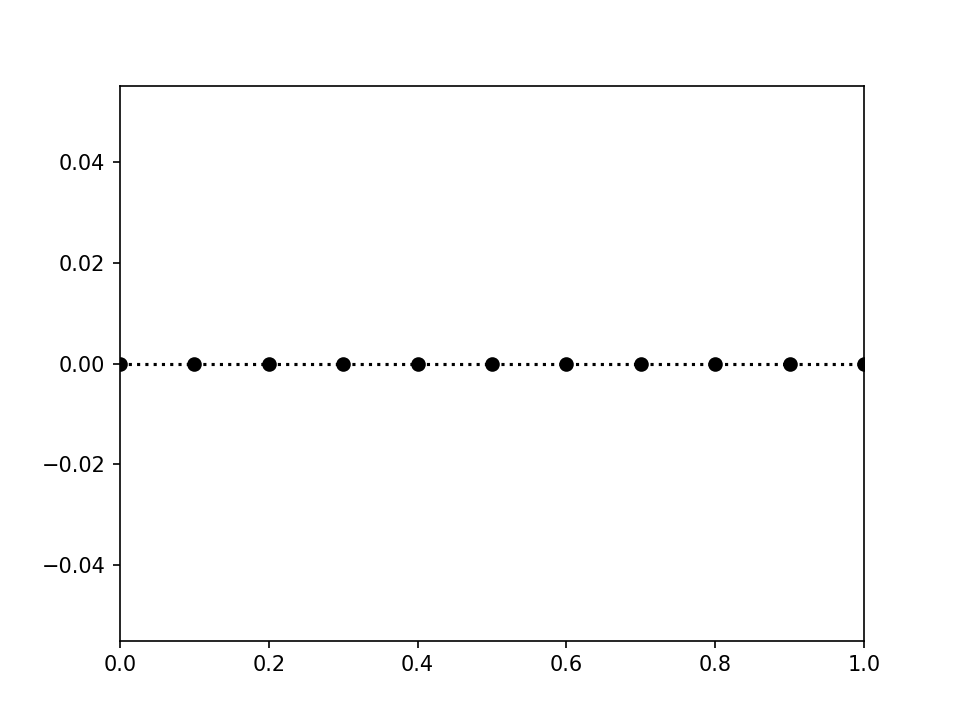

In [25]:
plt.figure(1)
plt.axhline(0.0,ls=':',color ='k')
for node in nodes:
    plt.plot(node,0,  'o', color = 'k')
plt.xlim(0,1)
plt.show()

In [15]:
# https://songhuiming.github.io/pages/2015/09/22/piecewise-linear-function-and-the-explanation/

# N+1 basis functions

# def phi0(x):
#     condlist = [(x<=-0.1), (x>=-0.1) & (x<=nodes[0]), (x>=nodes[0]) & (x<=nodes[1]), (x>=nodes[1])]
#     funclist = [lambda x: 0, lambda x: (x - (-0.1))/(nodes[0] - (-0.1)), lambda x: (nodes[1]-x)/(nodes[1] - nodes[0]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)
    
# def phi1(x):
#     condlist = [(x<=nodes[0]), (x>=nodes[0]) & (x<=nodes[1]), (x>=nodes[1]) & (x<=nodes[2]), (x>=nodes[2])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[0])/(nodes[1] - nodes[0]), lambda x: (nodes[2]-x)/(nodes[2] - nodes[1]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi2(x):
#     condlist = [(x<=nodes[1]), (x>=nodes[1]) & (x<=nodes[2]), (x>=nodes[2]) & (x<=nodes[3]), (x>=nodes[3])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[1])/(nodes[2] - nodes[1]), lambda x: (nodes[3]-x)/(nodes[3] - nodes[2]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi3(x):
#     condlist = [(x<=nodes[2]), (x>=nodes[2]) & (x<=nodes[3]), (x>=nodes[3]) & (x<=nodes[4]), (x>=nodes[4])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[2])/(nodes[3] - nodes[2]), lambda x: (nodes[4]-x)/(nodes[4] - nodes[3]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi4(x):
#     condlist = [(x<=nodes[3]), (x>=nodes[3]) & (x<=nodes[4]), (x>=nodes[4]) & (x<=nodes[5]), (x>=nodes[5])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[3])/(nodes[4] - nodes[3]), lambda x: (nodes[5]-x)/(nodes[5] - nodes[4]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi5(x):
#     condlist = [(x<=nodes[4]), (x>=nodes[4]) & (x<=nodes[5]), (x>=nodes[5]) & (x<=nodes[6]), (x>=nodes[6])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[4])/(nodes[5] - nodes[4]), lambda x: (nodes[6]-x)/(nodes[6] - nodes[5]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi6(x):
#     condlist = [(x<=nodes[5]), (x>=nodes[5]) & (x<=nodes[6]), (x>=nodes[6]) & (x<=nodes[7]), (x>=nodes[7])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[5])/(nodes[6] - nodes[5]), lambda x: (nodes[7]-x)/(nodes[7] - nodes[6]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi7(x):
#     condlist = [(x<=nodes[6]), (x>=nodes[6]) & (x<=nodes[7]), (x>=nodes[7]) & (x<=nodes[8]), (x>=nodes[8])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[6])/(nodes[7] - nodes[6]), lambda x: (nodes[8]-x)/(nodes[8] - nodes[7]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi8(x):
#     condlist = [(x<=nodes[7]), (x>=nodes[7]) & (x<=nodes[8]), (x>=nodes[8]) & (x<=nodes[9]), (x>=nodes[9])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[7])/(nodes[8] - nodes[7]), lambda x: (nodes[9]-x)/(nodes[9] - nodes[8]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def phi9(x):
#     condlist = [(x<=nodes[8]), (x>=nodes[8]) & (x<=nodes[9]), (x>=nodes[9]) & (x<=nodes[10]), (x>=nodes[10])]
#     funclist = [lambda x: 0, lambda x: (x - nodes[8])/(nodes[9] - nodes[8]), lambda x: (nodes[10]-x)/(nodes[10] - nodes[9]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)
                            
# def phi10(x):
#     condlist = [(x<=nodes[9]), (x>=nodes[9]) & (x<=nodes[10]), (x>=nodes[10]) & (x<=1.1), (x>=1.1)]
#     funclist = [lambda x: 0, lambda x: (x - nodes[9])/(nodes[10] - nodes[9]), lambda x: (1.1-x)/(1.1 - nodes[10]), lambda x: 0]
#     return np.piecewise(x, condlist, funclist)


In [26]:
x, h = sym.symbols('x h')

<IPython.core.display.Javascript object>


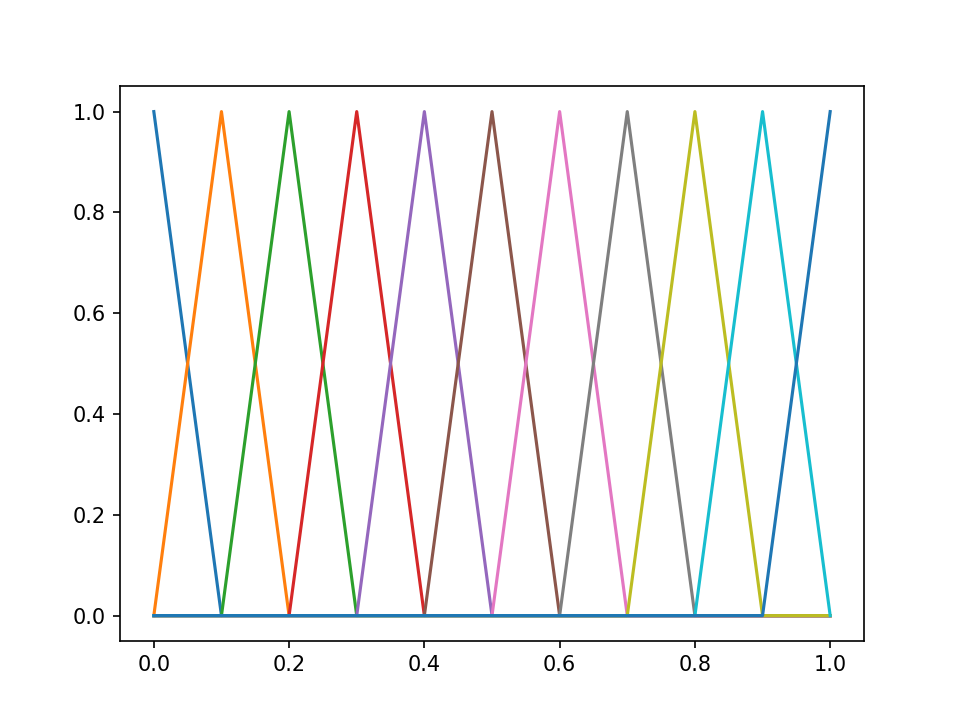

In [13]:
basis = [phi0(x), phi1(x), phi2(x), phi3(x), phi4(x), phi5(x),\
         phi6(x), phi7(x), phi8(x), phi9(x), phi10(x)]

x = np.linspace(0,1,1001)

plt.figure(2)
for i in range(N+1):
    plt.plot(x,basis[i])
plt.show()

Now is attempted another way of formulating the basis functions. This is discussed over at
http://hplgit.github.io/INF5620/doc/pub/sphinx-fem/._main_fem003.html

In [14]:
h = 1/N

The $N+1$ nodes occur on $[0,1]$ at $x_i = ih\,, i = 0, 1, 2, \ldots \, N\,.$
There are $N$ elements 

$$\Omega^{(i)} = [x_i, x_{i+1}] = [ih, (i+1)h]\,, \quad i = 0, 1, 2, \ldots, N_{e} = N-1\,.$$

In [15]:
newnodes = []
for i in range(N+1):
    newnodes.append(i*h)



Define the following basis functions:

$$
\psi_i(x) = 
\begin{cases}
0\,, &x \le x_{i-1}\, &\\[2mm]
\dfrac{x - x_{i-1}}{h}\,, &x_{i-1} \le x \le x_i\, &&\\[2mm]
1 - (x - x_{i})/h\,, &x_{i} \le x \le x_{i+1}\, &&\\[2mm]
0\,, & x_{i+1} \le x\,.
\end{cases}\,,
$$

For the zeroth basis function

$$
\psi_0(x) = 
\begin{cases}
0\,, &x \le x_{0} - h\, &\\[2mm]
\dfrac{x - (x_{0} - h)}{h}\,, &x_{0} - h \le x \le x_0\, &&\\[2mm]
1 - (x - x_0)/h\,, &x_{0} \le x \le x_{1}\, &&\\[2mm]
0\,, & x_{1} \le x\,.
\end{cases}\,
$$
on $\Omega = [x_0,x_{N}]\,,$ and

$$
\psi_N(x) = 
\begin{cases}
0\,, &x \le x_{N-1}\, &\\[2mm]
\dfrac{x - x_{N-1}}{h}\,, &x_{N-1} \le x \le x_N\, &\\[2mm]
1 - (x - x_N)/h\,, & x_{N} \le x \le x_{N}+h\, &&\\[2mm]
0\,, & x_{N} + h \le x\,.
\end{cases}\,.
$$


Consider now the matrix $A_{i,j}$ defined as follows:

$$
A_{i,j} = \int_{\Omega}\,\psi_i\psi_j\,dx\,.
$$

Now, the integrand $\psi_i(x)\psi_{j}(x)\ne 0$ under certain conditions. What are these conditions? An examination of the plots for $\psi_i(x)$ shows that $\psi_i(x)\psi_j(x)\ne 0$ provided either $i = j$, $j = i - 1,$ or $j = i +1\,.$ This means $i$ and $j$ belong to the same element.

In [16]:
# N+1 basis functions

# def psi0(x,newnodes):
#     condlist = [(x<= (newnodes[0] - h)), (x>=(newnodes[0] -h)) & (x<=newnodes[0]), (x>=newnodes[0]) & (x<=newnodes[1]), (x>=newnodes[1])]
#     funclist = [lambda x: 0, lambda x: (x - (newnodes[0]- h))/h, lambda x: 1 - (x - newnodes[0])/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)
    
# def psi1(x,newnodes):
#     condlist = [(x<=newnodes[0]), (x>=newnodes[0]) & (x<=newnodes[1]), (x>=newnodes[1]) & (x<=newnodes[2]), (x>=newnodes[2])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[0])/h, lambda x: 1 - (x - newnodes[1])/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi2(x,newnodes):
#     condlist = [(x<=newnodes[1]), (x>=newnodes[1]) & (x<=newnodes[2]), (x>=newnodes[2]) & (x<=newnodes[3]), (x>=newnodes[3])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[1])/h, lambda x: 1 - (x - newnodes[2])/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi3(x,newnodes):
#     condlist = [(x<=newnodes[2]), (x>=newnodes[2]) & (x<=newnodes[3]), (x>=newnodes[3]) & (x<=newnodes[4]), (x>=newnodes[4])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[2])/h, lambda x: 1 + (newnodes[3]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi4(x,newnodes):
#     condlist = [(x<=newnodes[3]), (x>=newnodes[3]) & (x<=newnodes[4]), (x>=newnodes[4]) & (x<=newnodes[5]), (x>=newnodes[5])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[3])/h, lambda x: 1 + (newnodes[4]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi5(x,newnodes):
#     condlist = [(x<=newnodes[4]), (x>=newnodes[4]) & (x<=newnodes[5]), (x>=newnodes[5]) & (x<=newnodes[6]), (x>=newnodes[6])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[4])/h, lambda x: 1 + (newnodes[5]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi6(x,newnodes):
#     condlist = [(x<=newnodes[5]), (x>=newnodes[5]) & (x<=newnodes[6]), (x>=newnodes[6]) & (x<=newnodes[7]), (x>=newnodes[7])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[5])/h, lambda x: 1 + (newnodes[6]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi7(x,newnodes):
#     condlist = [(x<=newnodes[6]), (x>=newnodes[6]) & (x<=newnodes[7]), (x>=newnodes[7]) & (x<=newnodes[8]), (x>=newnodes[8])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[6])/h, lambda x: 1 + (newnodes[7]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi8(x,newnodes):
#     condlist = [(x<=newnodes[7]), (x>=newnodes[7]) & (x<=newnodes[8]), (x>=newnodes[8]) & (x<=newnodes[9]), (x>=newnodes[9])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[7])/h, lambda x: 1 + (newnodes[8]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)

# def psi9(x,newnodes):
#     condlist = [(x<=newnodes[8]), (x>=newnodes[8]) & (x<=newnodes[9]), (x>=newnodes[9]) & (x<=newnodes[10]), (x>=newnodes[10])]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[8])/h, lambda x: 1 + (newnodes[9]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)
                            
# def psi10(x,newnodes):
#     condlist = [(x<=newnodes[9]), (x>=newnodes[9]) & (x<=newnodes[10]), (x>=newnodes[10]) & (x<=(newnodes[10]+h)), (x>=(newnodes[10]+h))]
#     funclist = [lambda x: 0, lambda x: (x - newnodes[9])/h, lambda x: 1 + (newnodes[10]-x)/h, lambda x: 0]
#     return np.piecewise(x, condlist, funclist)


def psi0(x):
    condlist = [(x<= (newnodes[0] - h)), (x>=(newnodes[0] -h)) & (x<=newnodes[0]), (x>=newnodes[0]) & (x<=newnodes[1]), (x>=newnodes[1])]
    funclist = [lambda x: 0, lambda x: (x - (newnodes[0]- h))/h, lambda x: 1 - (x - newnodes[0])/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)
    
def psi1(x):
    condlist = [(x<=newnodes[0]), (x>=newnodes[0]) & (x<=newnodes[1]), (x>=newnodes[1]) & (x<=newnodes[2]), (x>=newnodes[2])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[0])/h, lambda x: 1 - (x - newnodes[1])/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi2(x):
    condlist = [(x<=newnodes[1]), (x>=newnodes[1]) & (x<=newnodes[2]), (x>=newnodes[2]) & (x<=newnodes[3]), (x>=newnodes[3])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[1])/h, lambda x: 1 - (x - newnodes[2])/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi3(x):
    condlist = [(x<=newnodes[2]), (x>=newnodes[2]) & (x<=newnodes[3]), (x>=newnodes[3]) & (x<=newnodes[4]), (x>=newnodes[4])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[2])/h, lambda x: 1 + (newnodes[3]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi4(x):
    condlist = [(x<=newnodes[3]), (x>=newnodes[3]) & (x<=newnodes[4]), (x>=newnodes[4]) & (x<=newnodes[5]), (x>=newnodes[5])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[3])/h, lambda x: 1 + (newnodes[4]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi5(x):
    condlist = [(x<=newnodes[4]), (x>=newnodes[4]) & (x<=newnodes[5]), (x>=newnodes[5]) & (x<=newnodes[6]), (x>=newnodes[6])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[4])/h, lambda x: 1 + (newnodes[5]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi6(x):
    condlist = [(x<=newnodes[5]), (x>=newnodes[5]) & (x<=newnodes[6]), (x>=newnodes[6]) & (x<=newnodes[7]), (x>=newnodes[7])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[5])/h, lambda x: 1 + (newnodes[6]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi7(x):
    condlist = [(x<=newnodes[6]), (x>=newnodes[6]) & (x<=newnodes[7]), (x>=newnodes[7]) & (x<=newnodes[8]), (x>=newnodes[8])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[6])/h, lambda x: 1 + (newnodes[7]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi8(x):
    condlist = [(x<=newnodes[7]), (x>=newnodes[7]) & (x<=newnodes[8]), (x>=newnodes[8]) & (x<=newnodes[9]), (x>=newnodes[9])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[7])/h, lambda x: 1 + (newnodes[8]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)

def psi9(x):
    condlist = [(x<=newnodes[8]), (x>=newnodes[8]) & (x<=newnodes[9]), (x>=newnodes[9]) & (x<=newnodes[10]), (x>=newnodes[10])]
    funclist = [lambda x: 0, lambda x: (x - newnodes[8])/h, lambda x: 1 + (newnodes[9]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)
                            
def psi10(x):
    condlist = [(x<=newnodes[9]), (x>=newnodes[9]) & (x<=newnodes[10]), (x>=newnodes[10]) & (x<=(newnodes[10]+h)), (x>=(newnodes[10]+h))]
    funclist = [lambda x: 0, lambda x: (x - newnodes[9])/h, lambda x: 1 + (newnodes[10]-x)/h, lambda x: 0]
    return np.piecewise(x, condlist, funclist)



<IPython.core.display.Javascript object>


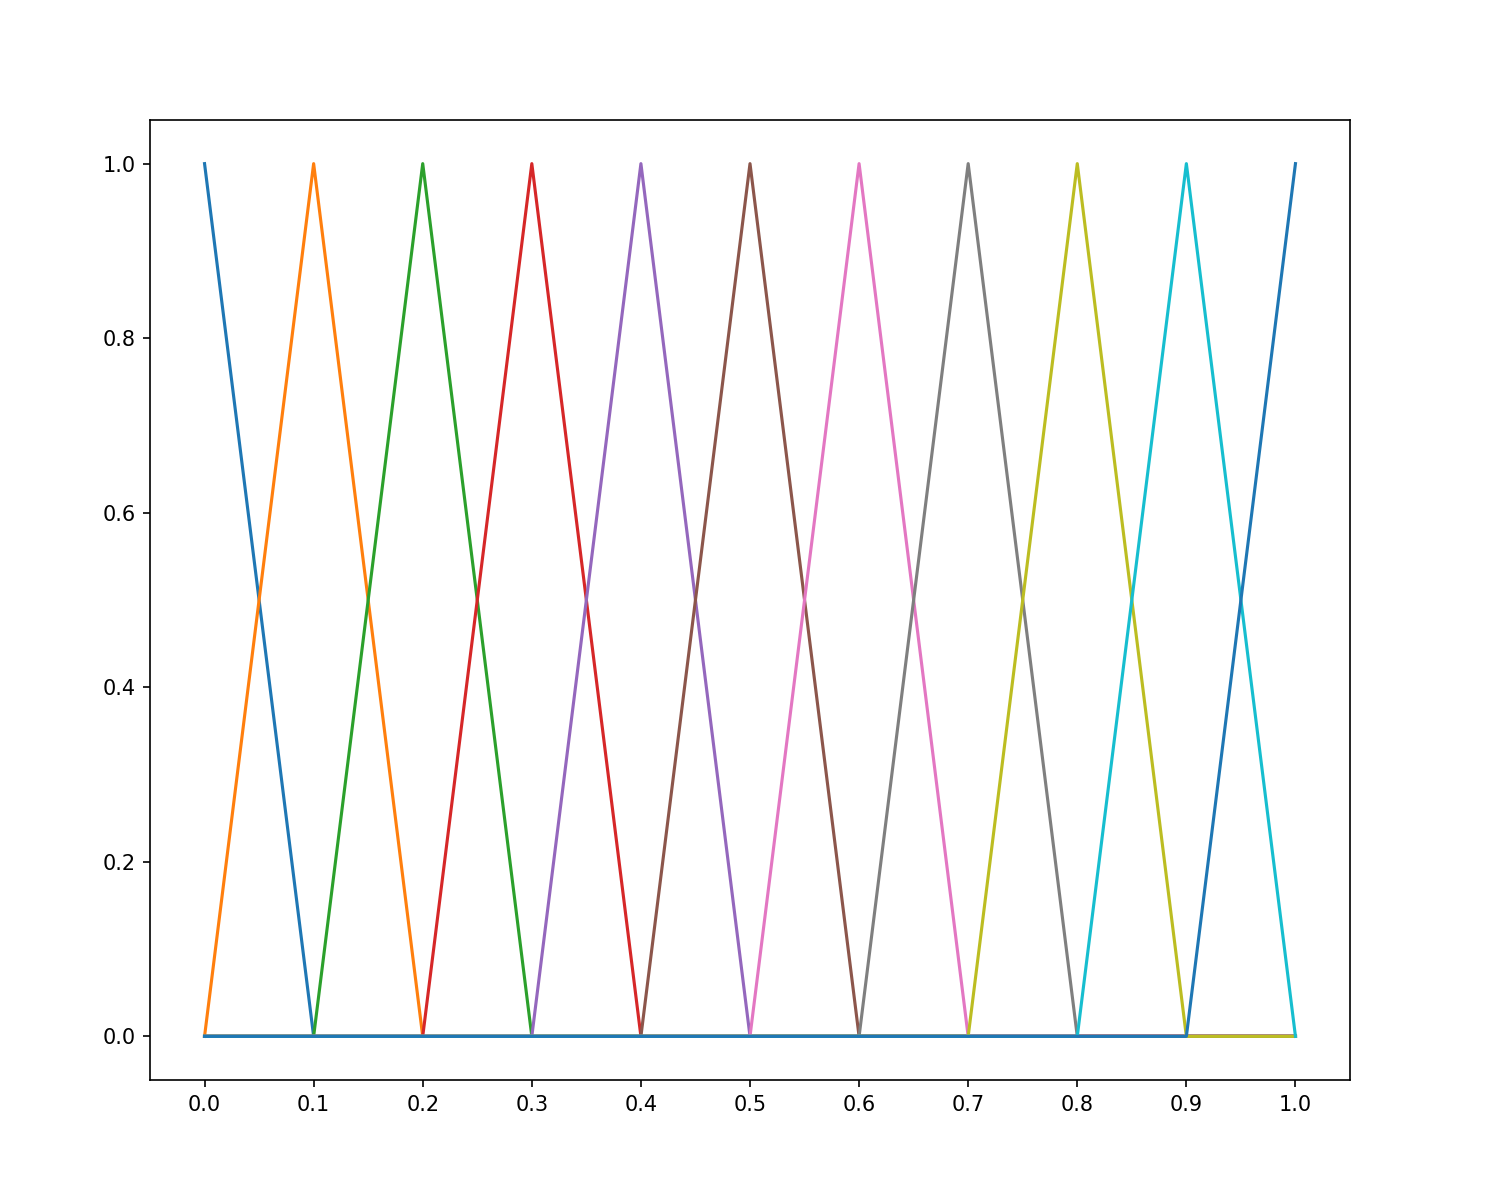

In [17]:
newbasis = [psi0(x),psi1(x),psi2(x),psi3(x),psi4(x),psi5(x),psi6(x),psi7(x),psi8(x),psi9(x),psi10(x)]

fig3 = plt.figure(3, figsize=(10,8))
ax = fig3.add_axes([0.1, 0.1, 0.8, 0.8])
for i in range(N+1):
    plt.plot(x,newbasis[i])
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.show()

In [18]:
def pc(x):
    return sum(c[i]*newbasis[i] for i in range(N+1))

In [19]:
a1 = lambda x: np.diff(f1)
plt.plot(x,a1)

ValueError: x and y must have same first dimension, but have shapes (1001,) and (1,)

In [20]:
print(integrate.quad((1 - (x - newnodes[0])/h)**2,0,1,args = (newnodes[0],h)))

ValueError: invalid callable given

In [21]:
Res(pc)

NameError: name 'Res' is not defined

In [22]:
K = np.zeros((N+1,N+1)) 

In [23]:
# Define the global connectivity matrix
K[0, 0] = 1
K[1, 0] = 0
K[1, 1] = -2
K[1, 2] = 1
K[N-1, N-2] = 1
K[N-1, N-1] = -2
K[N, N] = 1
for i in range(2,N-1):
    K[i, i-1] = 1
    K[i, i] = -2
    K[i, i+1] = 1

print(K)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [24]:
b = np.zeros(N+1)
b[0] = 0
b[-1] = 1
c0 = 0
cN = 1

b[1] = 6.*h**2*newnodes[1] - c0
b[N-1] = 6.*h**2*newnodes[N-1] - cN

for i in range(2,N-1):
    b[i] = 6.*h**2*newnodes[i]
    
print(b)



[ 0.     0.006  0.012  0.018  0.024  0.03   0.036  0.042  0.048 -0.946
  1.   ]


In [25]:
c = np.linalg.solve(K,b)
print(c)

[0.00e+00 1.00e-03 8.00e-03 2.70e-02 6.40e-02 1.25e-01 2.16e-01 3.43e-01
 5.12e-01 7.29e-01 1.00e+00]


<IPython.core.display.Javascript object>


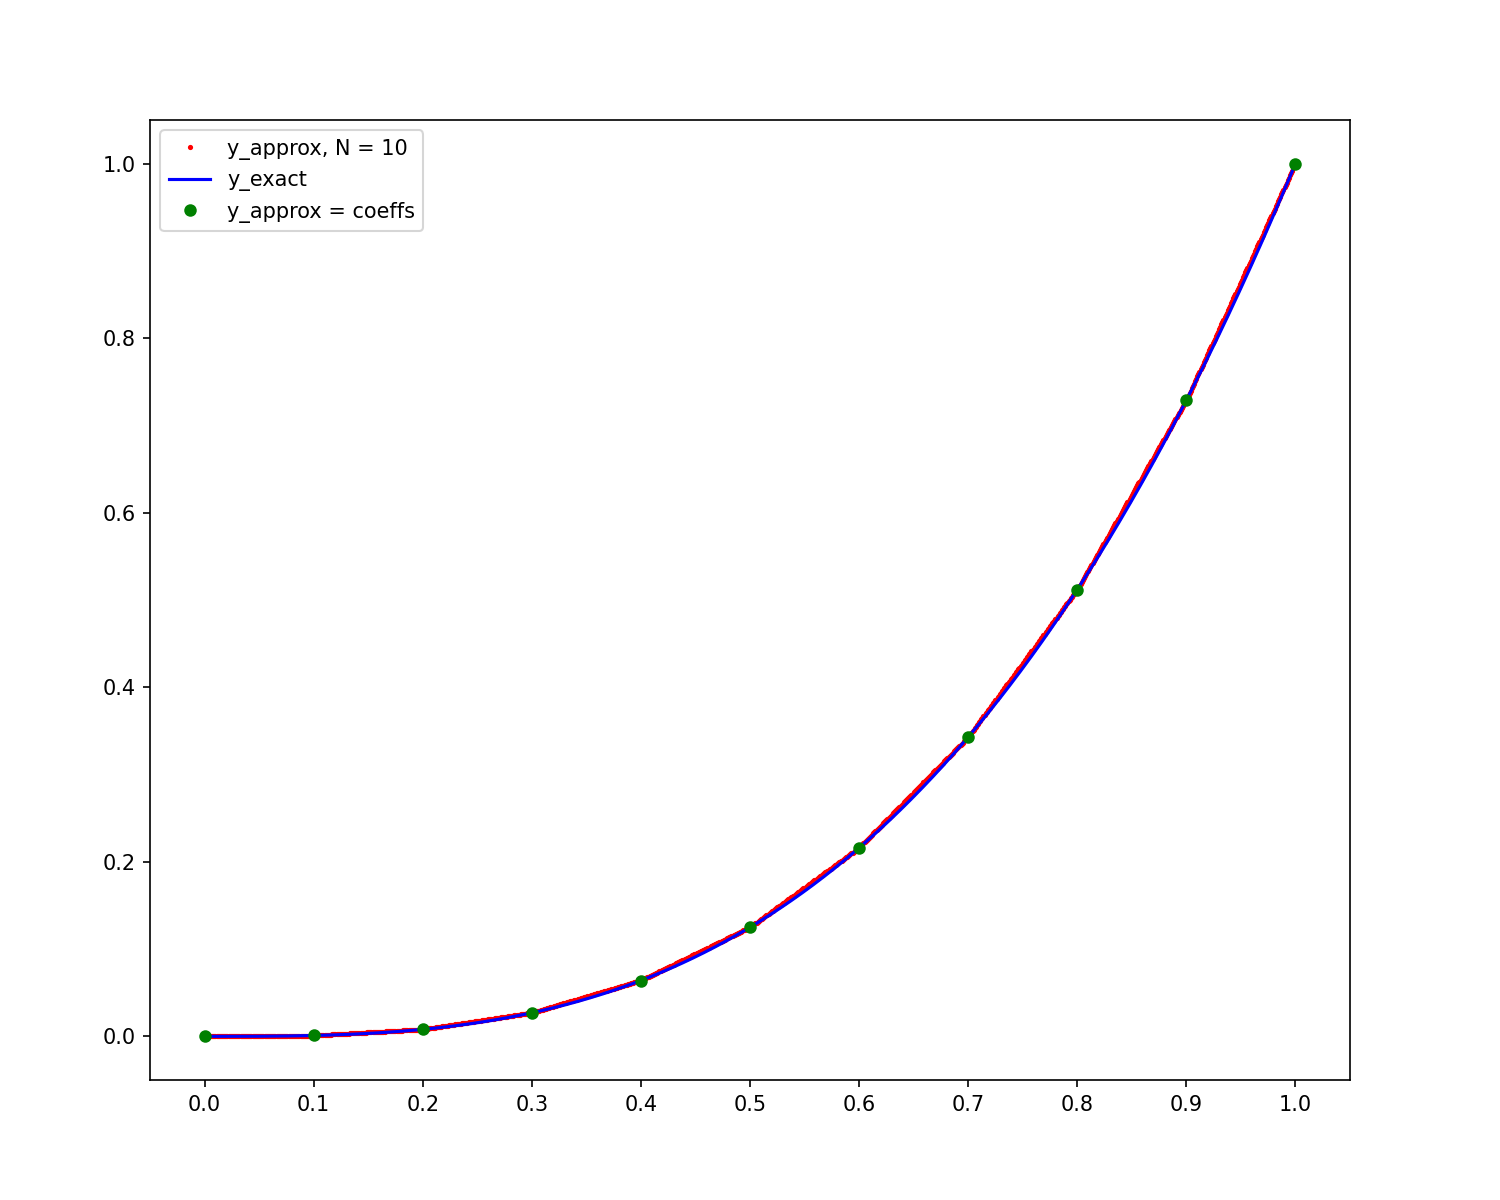

In [26]:
fig4 = plt.figure(4,figsize=(10,8))
ax = fig4.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot(x,pc(x), '.', markersize = 3.0, color = 'r',label=r'y_approx, N = 10')
plt.plot(x, x**3, color = 'b', label = r'y_exact')
plt.plot(newnodes[0], c[0], 'o', markersize=5, color = 'g', label = r'y_approx = coeffs')
for i in range(1,N+1):
    plt.plot(newnodes[i], c[i], 'o', markersize=5, color = 'g')
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.legend()
plt.show()

In [27]:
print(pc(x))

[0.0000e+00 1.0000e-05 2.0000e-05 ... 9.9458e-01 9.9729e-01 1.0000e+00]


In [28]:
pc(0.5)

array([0.0000e+00, 1.0000e-05, 2.0000e-05, ..., 9.9458e-01, 9.9729e-01,
       1.0000e+00])

In [29]:
print(pc[501])

TypeError: 'function' object is not subscriptable

In [35]:
M11 = integrate.simps(psi1(x)*psi1(x),x)

In [36]:
print(M11)

0.06666666666666667


In [37]:
M12 = integrate.simps(psi2(x)*psi1(x),x)

In [38]:
M12

0.01666666666666667